<a href="https://colab.research.google.com/github/massinoLight/HandwrittenSignatureForgeryDetectionUsingCNN/blob/master/Handwritten_Signature_Forgery_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importer les data sets presentes sur github au format zip**

In [ ]:
#Import une partie de la dataset du fichier zip qui est sur le github
import pathlib
import os
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
#Import dataset
import pathlib
import os
data_dir = tf.keras.utils.get_file(
    "datasets.zip",
    "https://github.com/massinoLight/HandwrittenSignatureForgeryDetectionUsingCNN/raw/master/datasets.zip",
    extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets/datasets')
print(data_dir)
print(os.path.abspath(data_dir))

/content/datasets/datasets
/content/datasets/datasets


In [ ]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

20


**Préprocess les images avec une fonction de keras afin de les avoir de la meme taille**

In [ ]:
#le nombre d'image a envoyer a notre reseau ici 3x3 (car nous ne disposons pas encore d'énormement d'images)
batch_size = 3
img_height = 200
img_width = 200

#recup les images (d'entrainement) dans le repértoire chaque nom de répertoire= une classe (ici uniquement deux ma vrai signature et des fausses)
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )
#recup les images (de validation) (ici je garde le méme répértoire pour les données d'entrainement et les données de test mais a changer par la suite)
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 18 files belonging to 2 classes.
Using 15 files for training.
Found 18 files belonging to 2 classes.
Using 3 files for validation.
['fake', 'true']


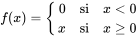

In [ ]:
from tensorflow.keras import layers
#le on définie le nombre de classes ici nous disposons de 2 true et fake
num_classes = 2

#on va définir notre réseau de neuron (ici avec 4 couches )
model = tf.keras.Sequential([
    #on normalise dans un premier temps notre jeux de données
    layers.experimental.preprocessing.Rescaling(1./255),
    #on définie nos couches de convolution (128 neurons avec une fonction d'activation relu (Unité de rectification linéaire) ) et de pooling (avec un max pooling) 
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit( 
    train_data,
  validation_data=val_data,
  epochs=2,
  callbacks=[tensorboard_callback]
)